In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import files
uploaded = files.upload()
excel_file=pd.ExcelFile('/content/Data Analyst Intern Assignment - Excel.xlsx')

Saving Data Analyst Intern Assignment - Excel.xlsx to Data Analyst Intern Assignment - Excel (2).xlsx


In [18]:
user_details = pd.read_excel(excel_file, sheet_name=excel_file.sheet_names[0])
cooking_sessions = pd.read_excel(excel_file, sheet_name=excel_file.sheet_names[1])
order_details = pd.read_excel(excel_file, sheet_name=excel_file.sheet_names[2])

In [19]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [20]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [21]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [22]:
user_sessions = pd.merge(user_details, cooking_sessions, on="User ID", how="inner")
full_data = pd.merge(user_sessions, order_details, on="Session ID", how="inner")

In [23]:
full_data

,User ID_x,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
5,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S010,...,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0
6,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S003,...,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,...,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN
8,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S011,...,4.6,1011,U003,2024-12-06,Breakfast,Pancakes,Completed,8.5,Morning,4.0
9,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,S005,...,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [24]:
full_data.columns

Index(['User ID_x', 'User Name', 'Age', 'Location', 'Registration Date',
       'Phone', 'Email', 'Favorite Meal', 'Total Orders', 'Session ID',
       'Dish Name_x', 'Meal Type_x', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating', 'Order ID', 'User ID_y',
       'Order Date', 'Meal Type_y', 'Dish Name_y', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')

In [25]:
full_data.drop(['User ID_y', 'Meal Type_y', 'Dish Name_y'], axis=1, inplace=True)

In [26]:
full_data.columns

Index(['User ID_x', 'User Name', 'Age', 'Location', 'Registration Date',
       'Phone', 'Email', 'Favorite Meal', 'Total Orders', 'Session ID',
       'Dish Name_x', 'Meal Type_x', 'Session Start', 'Session End',
       'Duration (mins)', 'Session Rating', 'Order ID', 'Order Date',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')

In [27]:
full_data.rename({'User ID_x' : 'User ID', 'Dish Name_x': 'Dish Name', 'Meal Type_x':'Meal Type'}, axis=1, inplace=True)

<ipython-input-28-f95012db1451>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dish Name', order=dish_order,data=full_data, palette='viridis')


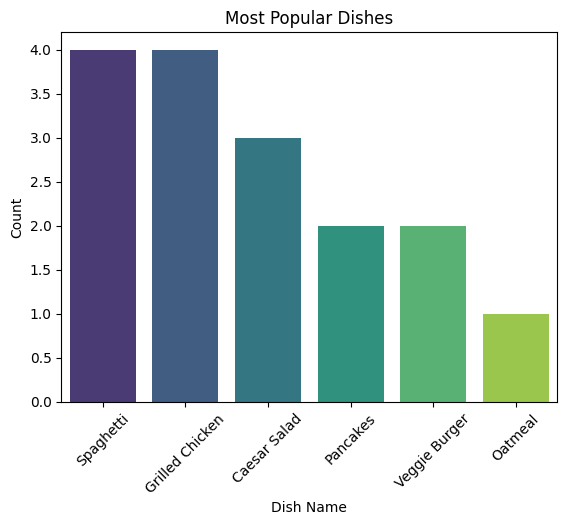

In [28]:
dish_order = full_data['Dish Name'].value_counts().index
sns.countplot(x='Dish Name', order=dish_order,data=full_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Count')
plt.show()

<ipython-input-30-f05a9f799b3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', order=dish_order,data=full_data, palette='viridis')


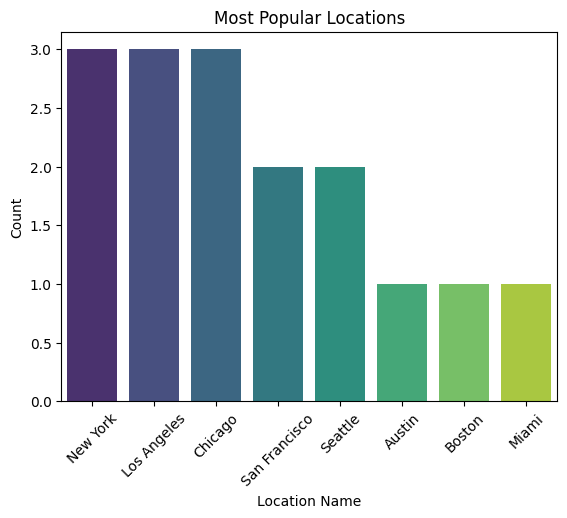

In [30]:
dish_order = full_data['Location'].value_counts().index
sns.countplot(x='Location', order=dish_order,data=full_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Most Popular Locations')
plt.xlabel('Location Name')
plt.ylabel('Count')
plt.show()

<ipython-input-38-dfefe09bd7fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=full_data,palette='viridis')


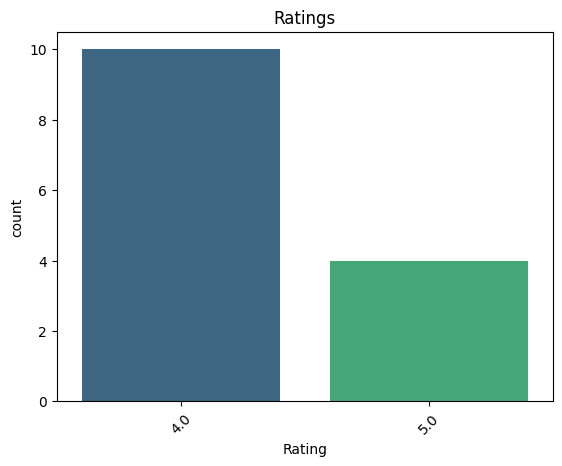

In [38]:
#rating_order = full_data['Rating'].value_counts().index
sns.countplot(x='Rating', data=full_data,palette='viridis')
plt.xticks(rotation=45)
plt.title('Ratings')
plt.show()

In [52]:
full_data['Order Status'].value_counts()

,count
Order Status,
Completed,14
Canceled,2


<ipython-input-44-64277aa9044f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Status', order=status_order,data=full_data, palette='viridis')


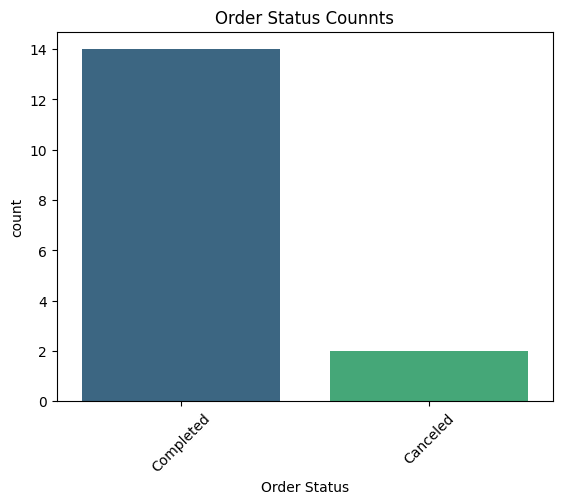

In [44]:
status_order = full_data['Order Status'].value_counts().index
sns.countplot(x='Order Status', order=status_order,data=full_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Order Status Counnts')
plt.show()

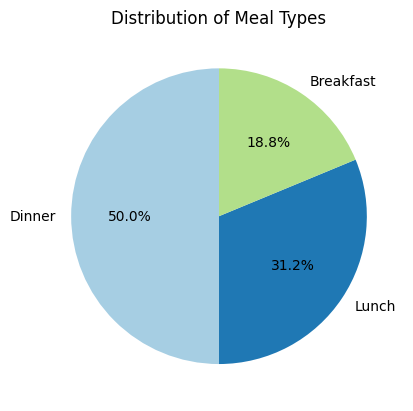

In [31]:
meal_counts = full_data['Meal Type'].value_counts()
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%',  startangle=90,colors=plt.cm.Paired.colors)
plt.title('Distribution of Meal Types')
plt.show()

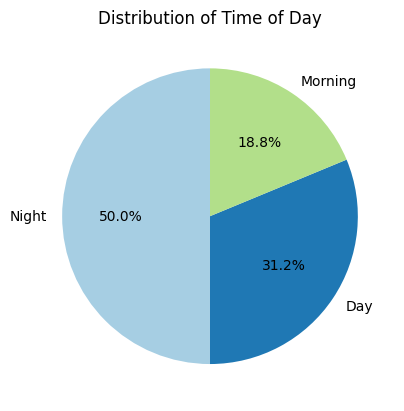

In [42]:
time_counts = full_data['Time of Day'].value_counts()
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%',  startangle=90,colors=plt.cm.Paired.colors)
plt.title('Distribution of Time of Day')
plt.show()

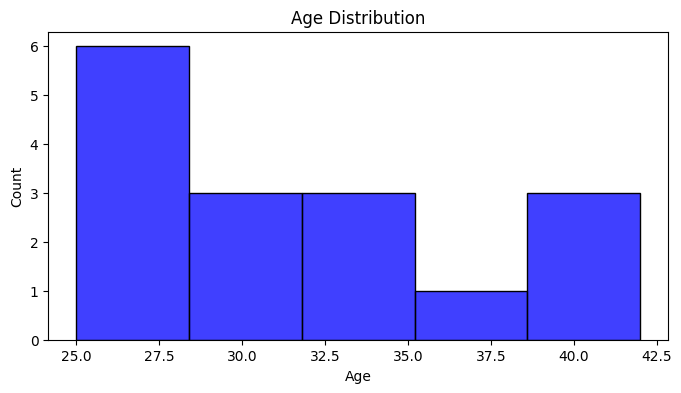

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(x='Age', data=full_data, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

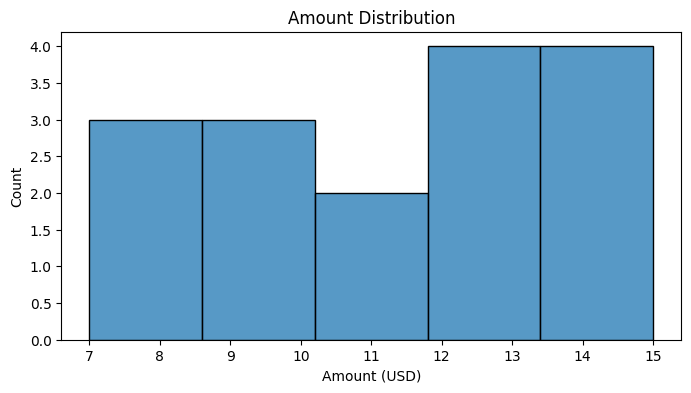

In [41]:
plt.figure(figsize=(8,4))
sns.histplot(x='Amount (USD)', data=full_data)
plt.title('Amount Distribution')
plt.show()

<ipython-input-51-b54b8505b37b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Duration (mins)', order=duration_order,data=full_data, palette='viridis')


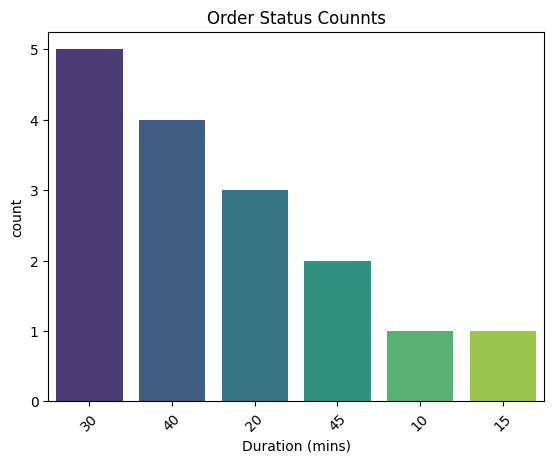

In [51]:
duration_order = full_data['Duration (mins)'].value_counts().index
sns.countplot(x='Duration (mins)', order=duration_order,data=full_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Order Status Counnts')
plt.show()

In [40]:
full_data.columns

Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders', 'Session ID', 'Dish Name',
       'Meal Type', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'Order Date', 'Order Status',
       'Amount (USD)', 'Time of Day', 'Rating'],
      dtype='object')

In [45]:
full_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,4.0


In [48]:
full_data.groupby(['User ID', 'User Name'])[['Total Orders', 'Amount (USD)']].sum()

,,Total Orders,Amount (USD)
User ID,User Name,,
U001,Alice Johnson,36,35.0
U002,Bob Smith,24,31.0
U003,Charlie Lee,45,32.0
U004,David Brown,20,21.5
U005,Emma White,18,22.5
U006,Frank Green,7,13.0
U007,Grace King,14,14.0
U008,Henry Lee,5,11.0


### Insights
* Most popular dishes are Spaghetti and Grilled Chicken
and least popular dish is oatmeal.
* NewYork, Los Angeles and Chicago are most poular locations,
from which users orderd the most.
* Austin, Boston and Miami are the locations where
users ordered less.
* Most of the users gave rating of 4.
* 14 completed orders and 2 cancelled orders.
* 50% orders for dinner, 18% orders for breakfast and
31% orders for lunch.
* Max orders are ordered from 25-28 age group people.
* Majorly food delivery takes 30 or 40 mins time.






### Recommendations

* As Spaghetti and Grilled Chicken are most popular,
so we can give some discount on these 2 dishes
which will attract more customers/users.
* The locations Austin, Boston and Miami
which are less performing, we should run marketing campaigns
to make awareness and attract more users.
* As numbers of orders for dinner is very high,
food makers and delivery partners shold remain more active
during this time.
* 25-28 age group people orders mostly, so
more food items which are suitable for this age group
should be added.
* Emphasis should be given to reduce the delivery time,
to make the experience better.